# 04 model experiments - TODO

## Purpose
To be filled during project development

## Steps
1. 
2. 
3. 

In [1]:
# CELL 1: Setup with correct paths
import os
import sys

# Get project root (one level up from notebooks)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Define common paths
DATA_PROCESSED = os.path.join(project_root, 'data', 'processed')
FIGURES = os.path.join(project_root, 'figures')
MODELS = os.path.join(project_root, 'models')

# Create directories
os.makedirs(FIGURES, exist_ok=True)
os.makedirs(MODELS, exist_ok=True)

print(f"📁 Project root: {project_root}")
print(f"📁 Data processed: {DATA_PROCESSED}")
print(f"📁 Models: {MODELS}")

# Now import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import json


# TensorFlow/Keras for LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
print("✅ TensorFlow/Keras imported successfully")

print("\n🧠 LSTM Model for EUR/USD Prediction")
print("="*50)


📁 Project root: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone
📁 Data processed: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/data/processed
📁 Models: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models
✅ TensorFlow/Keras imported successfully

🧠 LSTM Model for EUR/USD Prediction


In [2]:
# CELL 2: Load LSTM sequences
print("\n📂 Loading LSTM sequences...")
lstm_data_path = os.path.join(DATA_PROCESSED, 'lstm_sequences.pkl')

if not os.path.exists(lstm_data_path):
    print(f"❌ ERROR: File not found: {lstm_data_path}")
    print("Please run 03_feature_engineering.ipynb first!")
else:
    with open(lstm_data_path, 'rb') as f:
        lstm_data = pickle.load(f)
    
    X_train = lstm_data['X_train']
    X_test = lstm_data['X_test']
    y_train = lstm_data['y_train']
    y_test = lstm_data['y_test']
    scaler = lstm_data['scaler']
    seq_length = lstm_data['seq_length']
    close_prices = lstm_data['original_prices']  # Get original prices
    dates = lstm_data['dates']  # Get dates
    
    print(f"✅ Sequences loaded:")
    print(f"   X_train shape: {X_train.shape}")
    print(f"   X_test shape:  {X_test.shape}")
    print(f"   y_train shape: {y_train.shape}")
    print(f"   y_test shape:  {y_test.shape}")
    print(f"   Sequence length: {seq_length}")
    print(f"   Original prices shape: {close_prices.shape}")


📂 Loading LSTM sequences...
✅ Sequences loaded:
   X_train shape: (574, 60, 1)
   X_test shape:  (144, 60, 1)
   y_train shape: (574, 1)
   y_test shape:  (144, 1)
   Sequence length: 60
   Original prices shape: (778, 1)


In [3]:
# CELL 2.5: Recreate scaled_close for future predictions
print("\n⚙️ Preparing scaled data for future predictions...")

# We need to recreate scaled_close for the future prediction
scaler_future = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler_future.fit_transform(close_prices)

print(f"✅ Scaled data prepared for future predictions")
print(f"   Original prices: ${close_prices[-1][0]:.4f}")
print(f"   Scaled last value: {scaled_close[-1][0]:.4f}")


⚙️ Preparing scaled data for future predictions...
✅ Scaled data prepared for future predictions
   Original prices: $1.1641
   Scaled last value: 0.8587


In [4]:
# CELL 3: Build LSTM model (using your instructor's architecture)
print("\n🏗️ Building LSTM model...")

# Reshape for LSTM: (samples, timesteps, features)
# X_train is already in correct shape: (samples, seq_length, 1)

model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True,
            input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

print("✅ Model built successfully!")
print("\nModel Summary:")
model.summary()


🏗️ Building LSTM model...
✅ Model built successfully!

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# CELL 4: Train the LSTM model
print("\n🚀 Training LSTM model...")

# Define callbacks
callbacks = [
  EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
  ModelCheckpoint(
      filepath=os.path.join(MODELS, 'lstm_best_model.h5'),
      monitor='val_loss',
      save_best_only=True,
      verbose=1
  )
]

# Train the model
history = model.fit(
  X_train, y_train,
  epochs=50,
  batch_size=32,
  validation_split=0.2,
  verbose=1,
  callbacks=callbacks
)

print("✅ Model training completed!")


🚀 Training LSTM model...
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0970
Epoch 1: val_loss improved from None to 0.04495, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0595 - val_loss: 0.0449
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0169
Epoch 2: val_loss improved from 0.04495 to 0.04415, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0151 - val_loss: 0.0441
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0122
Epoch 3: val_loss improved from 0.04415 to 0.04307, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0132 - val_loss: 0.0431
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0115
Epoch 4: val_loss improved from 0.04307 to 0.04203, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0119 - val_loss: 0.0420
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0109
Epoch 5: val_loss improved from 0.04203 to 0.04089, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0110 - val_loss: 0.0409
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0117
Epoch 6: val_loss improved from 0.04089 to 0.03765, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0108 - val_loss: 0.0377
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0114
Epoch 7: val_loss improved from 0.03765 to 0.03491, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0098 - val_loss: 0.0349
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0106
Epoch 8: val_loss improved from 0.03491 to 0.03209, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0110 - val_loss: 0.0321
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0103
Epoch 9: val_loss improved from 0.03209 to 0.02921, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0097 - val_loss: 0.0292
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0102
Epoch 10: val_loss improved from 0.02921 to 0.02837, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0102 - val_loss: 0.0284
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0100
Epoch 11: val_loss improved from 0.02837 to 0.02685, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0097 - val_loss: 0.0268
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0088
Epoch 12: val_loss improved from 0.02685 to 0.02587, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0099 - val_loss: 0.0259
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0090
Epoch 13: val_loss improved from 0.02587 to 0.02268, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0080 - val_loss: 0.0227
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0077
Epoch 14: val_loss improved from 0.02268 to 0.02053, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0079 - val_loss: 0.0205
Epoch 15/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0069
Epoch 15: val_loss improved from 0.02053 to 0.01864, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0072 - val_loss: 0.0186
Epoch 16/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0068
Epoch 16: val_loss improved from 0.01864 to 0.01758, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0072 - val_loss: 0.0176
Epoch 17/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0061
Epoch 17: val_loss did not improve from 0.01758
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0066 - val_loss: 0.0178
Epoch 18/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0074
Epoch 18: val_loss improved from 0.01758 to 0.01703, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0074 - val_loss: 0.0170
Epoch 19/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0072
Epoch 19: val_loss improved from 0.01703 to 0.01671, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0070 - val_loss: 0.0167
Epoch 20/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0063
Epoch 20: val_loss improved from 0.01671 to 0.01589, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0070 - val_loss: 0.0159
Epoch 21/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0061
Epoch 21: val_loss did not improve from 0.01589
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0059 - val_loss: 0.0181
Epoch 22/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0066
Epoch 22: val_loss improved from 0.01589 to 0.01576, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0068 - val_loss: 0.0158
Epoch 23/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0062
Epoch 23: val_loss improved from 0.01576 to 0.01536, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0057 - val_loss: 0.0154
Epoch 24/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0064
Epoch 24: val_loss improved from 0.01536 to 0.01478, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0064 - val_loss: 0.0148
Epoch 25/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0063
Epoch 25: val_loss improved from 0.01478 to 0.01432, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0059 - val_loss: 0.0143
Epoch 26/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0057
Epoch 26: val_loss did not improve from 0.01432
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0061 - val_loss: 0.0156
Epoch 27/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0060
Epoch 27: val_loss did not improve from 0.01432
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0058 - val_loss: 0.0161
Epoch 28/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0057
Epoch 28: val_loss did not improve from 0.01432
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0056 - val_loss: 0.0151
Epoch 29/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0056
Epoch 29: val_loss did not improve from 0.01432
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0054 - val_loss: 0.0144
Epoch 30/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0062
Epoch 30: val_loss did not improve from 0.01432
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0056 

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0053 - val_loss: 0.0143
Epoch 32/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0057
Epoch 32: val_loss improved from 0.01431 to 0.01356, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0057 - val_loss: 0.0136
Epoch 33/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0062
Epoch 33: val_loss did not improve from 0.01356
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0057 - val_loss: 0.0140
Epoch 34/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0057
Epoch 34: val_loss did not improve from 0.01356
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0058 - val_loss: 0.0148
Epoch 35/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0051
Epoch 35: val_loss did not improve from 0.01356
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0058 - val_loss: 0.0141
Epoch 36/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0051
Epoch 36: val_loss did not improve from 0.01356
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0055 - val_loss: 0.0142
Epoch 37/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0058
Epoch 37: val_loss did not improve from 0.01356
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0056 

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0048 - val_loss: 0.0133
Epoch 43/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0046
Epoch 43: val_loss did not improve from 0.01331
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0046 - val_loss: 0.0134
Epoch 44/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0050
Epoch 44: val_loss did not improve from 0.01331
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0046 - val_loss: 0.0137
Epoch 45/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0050
Epoch 45: val_loss did not improve from 0.01331
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0055 - val_loss: 0.0143
Epoch 46/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0042
Epoch 46: val_loss did not improve from 0.01331
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0045 - val_loss: 0.0137
Epoch 47/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0045
Epoch 47: val_loss improved from 0.01331 to 0.01294, saving model to /Users/guillermo/Documents/Ironhac

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0046 - val_loss: 0.0129
Epoch 48/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0053
Epoch 48: val_loss did not improve from 0.01294
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0052 - val_loss: 0.0144
Epoch 49/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0050
Epoch 49: val_loss did not improve from 0.01294
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0052 - val_loss: 0.0135
Epoch 50/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0042
Epoch 50: val_loss improved from 0.01294 to 0.01282, saving model to /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0045 - val_loss: 0.0128
✅ Model training completed!


In [6]:
# CELL 5: Load the best model (saved by ModelCheckpoint)
print("\n📂 Loading best model...")
best_model_path = os.path.join(MODELS, 'lstm_best_model.h5')
if os.path.exists(best_model_path):
    # Load without compiling
    best_model = load_model(best_model_path, compile=False)
    
    # Recompile with the correct metrics
    best_model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae', 'mse']  # Use string names instead of keras.metrics.mse
    )
    print(f"✅ Best model loaded from: {best_model_path}")
else:
    print(f"❌ Model file not found: {best_model_path}")


📂 Loading best model...
✅ Best model loaded from: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5


In [7]:
# CELL 6: Make predictions
print("\n🔮 Making predictions...")
y_pred_scaled = best_model.predict(X_test)

# Inverse transform predictions to original scale
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

print(f"✅ Predictions made: {len(y_pred)} predictions")


🔮 Making predictions...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
✅ Predictions made: 144 predictions


In [8]:
# CELL 7: Calculate evaluation metrics
print("\n📊 Evaluating model performance...")

mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print("LSTM Model Performance:")
print(f"  MAE:  ${mae:.4f}")
print(f"  MSE:  ${mse:.6f}")
print(f"  RMSE: ${rmse:.4f}")
print(f"  R²:   {r2:.4f}")

# Calculate baseline (predict last known price)
baseline_pred = np.roll(y_test_original, 1)
baseline_pred[0] = y_test_original[0]  # First prediction uses actual value
baseline_mae = mean_absolute_error(y_test_original, baseline_pred)

print(f"\nBaseline (previous day price):")
print(f"  MAE: ${baseline_mae:.4f}")

improvement = (baseline_mae - mae) / baseline_mae * 100
print(f"\nLSTM Improvement over baseline: {improvement:.1f}%")


📊 Evaluating model performance...
LSTM Model Performance:
  MAE:  $107369.6274
  MSE:  $27177568017.387039
  RMSE: $164856.2041
  R²:   -195490686178459.1875

Baseline (previous day price):
  MAE: $0.0036

LSTM Improvement over baseline: -2950609970.2%



📈 Visualizing training history...


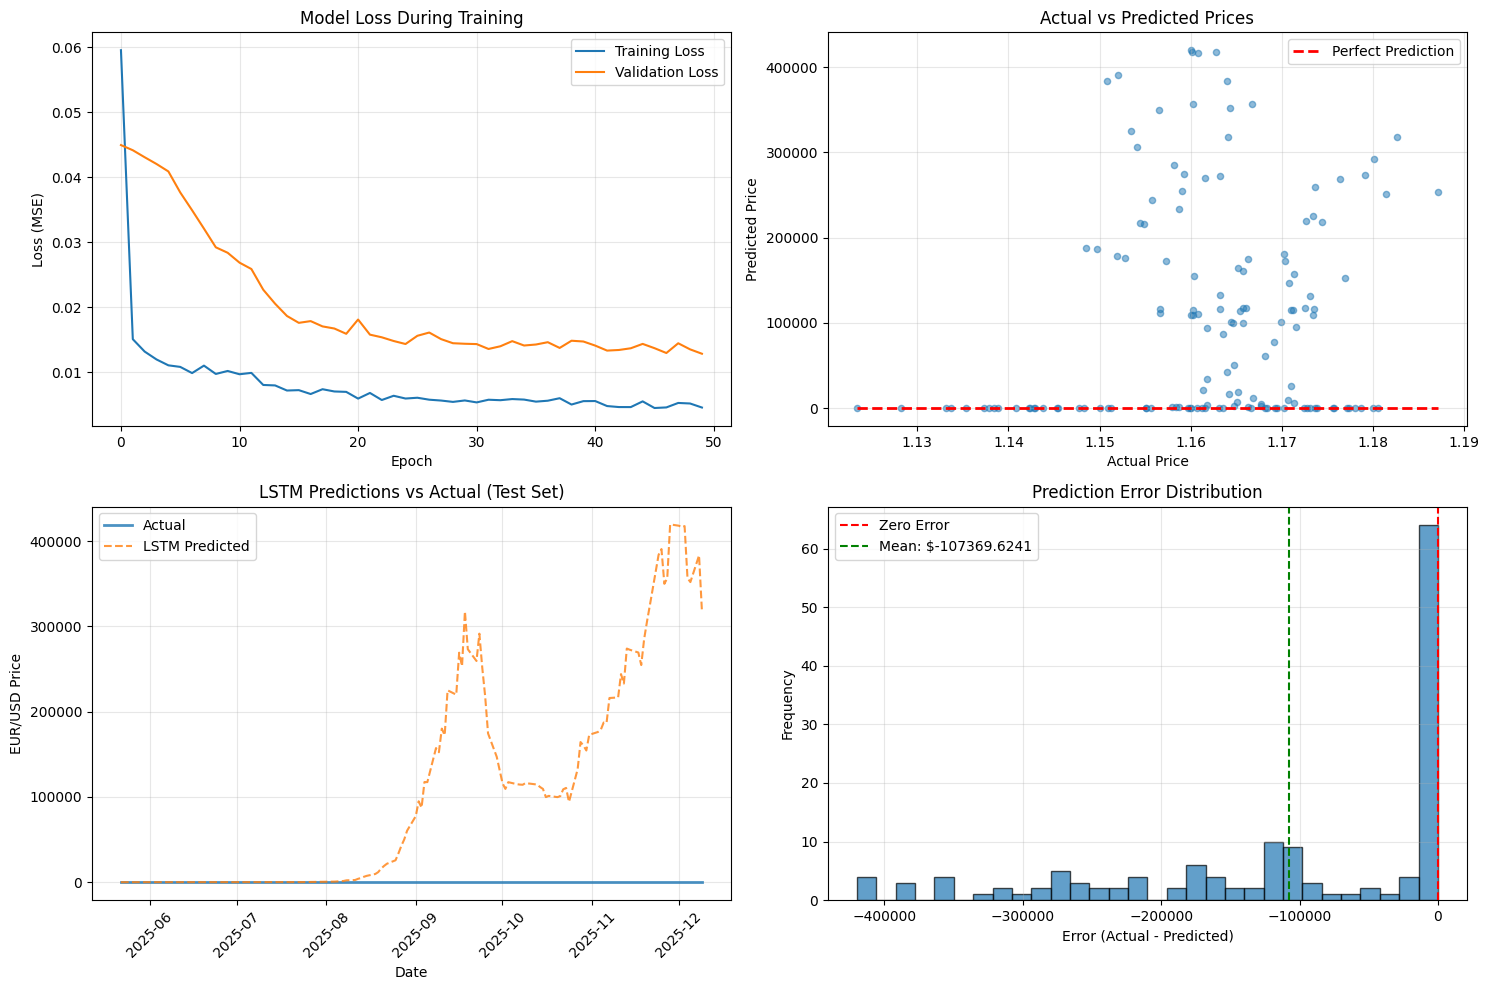

✅ LSTM results visualization saved to: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/figures/lstm_results.png


In [9]:
# CELL 8: Visualize training history
print("\n📈 Visualizing training history...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Loss curves
axes[0, 0].plot(history.history['loss'], label='Training Loss')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 0].set_title('Model Loss During Training')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted (scatter)
axes[0, 1].scatter(y_test_original, y_pred, alpha=0.5, s=20)
axes[0, 1].plot([y_test_original.min(), y_test_original.max()],
              [y_test_original.min(), y_test_original.max()],
              'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_title('Actual vs Predicted Prices')
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Predicted Price')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Time series comparison
test_dates = lstm_data['dates'][-len(y_test_original):]
axes[1, 0].plot(test_dates, y_test_original, label='Actual', alpha=0.8, linewidth=2)
axes[1, 0].plot(test_dates, y_pred, label='LSTM Predicted', alpha=0.8, linestyle='--')
axes[1, 0].set_title('LSTM Predictions vs Actual (Test Set)')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('EUR/USD Price')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45)

# Plot 4: Error distribution
errors = y_test_original.flatten() - y_pred.flatten()
axes[1, 1].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--', label='Zero Error')
axes[1, 1].axvline(x=np.mean(errors), color='g', linestyle='--', label=f'Mean: ${np.mean(errors):.4f}')
axes[1, 1].set_title('Prediction Error Distribution')
axes[1, 1].set_xlabel('Error (Actual - Predicted)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
lstm_results_path = os.path.join(FIGURES, 'lstm_results.png')
plt.savefig(lstm_results_path, dpi=100, bbox_inches='tight')
plt.show()

print(f"✅ LSTM results visualization saved to: {lstm_results_path}")

In [10]:
# CELL 9: Save model and results
print("\n💾 Saving model and results...")

# Save final model
final_model_path = os.path.join(MODELS, 'lstm_final_model.h5')
best_model.save(final_model_path)
print(f"✅ Final model saved to: {final_model_path}")

# Save predictions
predictions_df = pd.DataFrame({
    'date': test_dates,
    'actual': y_test_original.flatten(),
    'predicted': y_pred.flatten(),
    'error': errors
})
predictions_path = os.path.join(DATA_PROCESSED, 'lstm_predictions.csv')
predictions_df.to_csv(predictions_path, index=False)
print(f"✅ Predictions saved to: {predictions_path}")

# Save model metrics
metrics = {
    'mae': float(mae),
    'mse': float(mse),
    'rmse': float(rmse),
    'r2': float(r2),
    'baseline_mae': float(baseline_mae),
    'improvement_pct': float(improvement),
    'training_epochs': len(history.history['loss']),
    'final_val_loss': float(history.history['val_loss'][-1]),
    'model_architecture': 'LSTM with 4 layers (50,60,80,120 units)',
    'sequence_length': seq_length
}

metrics_path = os.path.join(MODELS, 'lstm_metrics.json')
with open(metrics_path, 'w') as f:
    json.dump(metrics, f, indent=2)
print(f"✅ Model metrics saved to: {metrics_path}")


💾 Saving model and results...
✅ Final model saved to: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_final_model.h5
✅ Predictions saved to: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/data/processed/lstm_predictions.csv
✅ Model metrics saved to: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_metrics.json


In [11]:
# CELL 10: Make future predictions
print("\n🔮 Making future prediction (next day)...")

# Get the last sequence from the data
last_sequence = scaled_close[-seq_length:].reshape(1, seq_length, 1)

# Predict next day
next_day_scaled = best_model.predict(last_sequence)
next_day_price = scaler.inverse_transform(next_day_scaled)[0][0]

# Get current price
current_price = close_prices[-1][0]
predicted_change = ((next_day_price - current_price) / current_price) * 100

print(f"Current EUR/USD price: ${current_price:.4f}")
print(f"Predicted next day price: ${next_day_price:.4f}")
print(f"Predicted change: {predicted_change:+.2f}%")

# Save future prediction
future_pred = {
  'current_price': float(current_price),
  'predicted_next_day': float(next_day_price),
  'predicted_change_pct': float(predicted_change),
  'prediction_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

future_path = os.path.join(MODELS, 'future_prediction.json')
with open(future_path, 'w') as f:
  json.dump(future_pred, f, indent=2)
print(f"✅ Future prediction saved to: {future_path}")


🔮 Making future prediction (next day)...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Current EUR/USD price: $1.1641
Predicted next day price: $315572.9375
Predicted change: +27107617.11%
✅ Future prediction saved to: /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/future_prediction.json


In [12]:
# CELL 11: Summary
print("\n" + "="*60)
print("✅ LSTM MODEL TRAINING COMPLETE")
print("="*60)

print(f"\n1. MODEL PERFORMANCE:")
print(f"   • MAE: ${mae:.4f}")
print(f"   • R²:  {r2:.4f}")
print(f"   • Improvement over baseline: {improvement:.1f}%")

print(f"\n2. FILES SAVED:")
print(f"   • {final_model_path}")
print(f"   • {best_model_path}")
print(f"   • {predictions_path}")
print(f"   • {metrics_path}")
print(f"   • {future_path}")
print(f"   • {lstm_results_path}")

print(f"\n3. PREDICTION:")
print(f"   • Current: ${current_price:.4f}")
print(f"   • Next day: ${next_day_price:.4f}")
print(f"   • Change: {predicted_change:+.2f}%")

print(f"\n4. NEXT STEPS:")
print("   • Open 05_ml_models.ipynb for traditional ML comparison")
print("   • Open 06_mlflow_tracking.ipynb for experiment tracking")

print("\n🎉 LSTM baseline model ready!")


✅ LSTM MODEL TRAINING COMPLETE

1. MODEL PERFORMANCE:
   • MAE: $107369.6274
   • R²:  -195490686178459.1875
   • Improvement over baseline: -2950609970.2%

2. FILES SAVED:
   • /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_final_model.h5
   • /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_best_model.h5
   • /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/data/processed/lstm_predictions.csv
   • /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/lstm_metrics.json
   • /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/models/future_prediction.json
   • /Users/guillermo/Documents/Ironhack/M8_Capstone/2-Capstone-2_MLOps/1-Development/eurusd-capstone/figures/lstm_results.png

3. PREDICTION:
   • Current: $1.1641
   • Ne